In [1]:
import numpy as np
import matplotlib.pyplot as plt
import string

In [2]:
ss = "I am very lucky"

In [3]:
import re
def txt2sig_txt(ss):
    xx = [x for x in re.sub('[aeiouy ,-]','', ss.lower())]
    return list(dict.fromkeys(xx))

sig_chars = txt2sig_txt(ss='I am rich')

In [4]:
sig_chars

['m', 'r', 'c', 'h']

In [5]:
def ring(n=4,r=100):
    T = np.linspace(0,2*np.pi,n+1)
    return r*np.cos(T), r*np.sin(T)

def txt2path(sig_chars):
    def lets2pos():
        pts= []
        rs = [100,70, 30]
        for n in [13, 8, 5]:
            tt = zip(* ring(n=n, r=rs.pop(0))) 
            pts.extend( list(tt)[:-1])
        return dict(zip(string.ascii_lowercase, pts))
    
    pos =  lets2pos()
    return [ np.array(pos[x]) for x in sig_chars] 

In [6]:
txt2path(string.ascii_lowercase)

[array([100.,   0.]),
 array([88.54560257, 46.4723172 ]),
 array([56.80647467, 82.29838659]),
 array([12.05366803, 99.27088741]),
 array([-35.4604887 ,  93.50162427]),
 array([-74.85107482,  66.31226582]),
 array([-97.09418174,  23.93156643]),
 array([-97.09418174, -23.93156643]),
 array([-74.85107482, -66.31226582]),
 array([-35.4604887 , -93.50162427]),
 array([ 12.05366803, -99.27088741]),
 array([ 56.80647467, -82.29838659]),
 array([ 88.54560257, -46.4723172 ]),
 array([70.,  0.]),
 array([49.49747468, 49.49747468]),
 array([4.2862638e-15, 7.0000000e+01]),
 array([-49.49747468,  49.49747468]),
 array([-7.00000000e+01,  8.57252759e-15]),
 array([-49.49747468, -49.49747468]),
 array([-1.28587914e-14, -7.00000000e+01]),
 array([ 49.49747468, -49.49747468]),
 array([30.,  0.]),
 array([ 9.27050983, 28.53169549]),
 array([-24.27050983,  17.63355757]),
 array([-24.27050983, -17.63355757]),
 array([  9.27050983, -28.53169549])]

In [7]:
import string


In [8]:
txt2path(sig_chars)

[array([ 88.54560257, -46.4723172 ]),
 array([-7.00000000e+01,  8.57252759e-15]),
 array([56.80647467, 82.29838659]),
 array([-97.09418174, -23.93156643])]

In [9]:
def tan2vec(u):
    x = np.zeros(3)
    x[:2] = u[:2]
    x[2] = u[:2].dot(u[2:])
    return x


u = np.array((0,1,1,0))
v = np.array((1,0,0,1))
np.cross(tan2vec(u), tan2vec(v))



array([ 0.,  0., -1.])

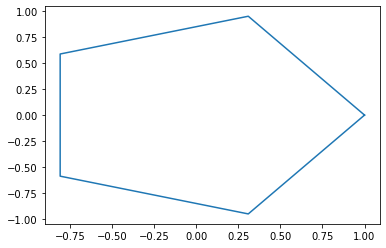

In [10]:
T = np.linspace(0,2*np.pi,6)
X = np.cos(T)
Y = np.sin(T)

plt.plot(X,Y)

0.7265425280053609 0.7265425280053609
0.7265425280053606 0.7265425280053608
0.726542528005361 0.7265425280053611
0.7265425280053608 0.7265425280053608
0.7265425280053609 0.7265425280053609


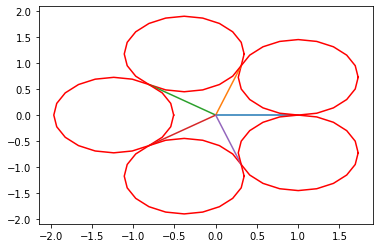

In [11]:
def ref(x, yy):
    # avoids a square root
    # reflection in the middle
    return x - 2*np.dot(x,yy)*yy/sum(yy*yy)

def t2line(pt,tt):
    x = np.zeros(3)
    x[:2] = tt[:2]
    x[2] = -np.dot(pt,tt)
    return x

t2vec = t2line

def a2b(a,b):
    plt.plot([a[0],b[0]], [a[1],b[1]])
    
def rot(tx = np.radians(30)):
    c, s = np.cos(tx), np.sin(tx)
    return np.array(((c, -s), (s, c)))

    
pts = np.zeros((2,len(X)))
pts[0] = X
pts[1] = Y
pts = pts.transpose()
N = np.array([-1,0])
def ab(a,b):
    plt.plot([a[0],b[0]], [a[1],b[1]])

for a,b in zip(pts[:-1], pts[1:]):
    
    ab(a,a+N)
    xx = np.cross( t2vec((b+a)/2, b-a ) , t2vec(a,N))
    xx = xx / xx[2]
    N = ref(N,a-b)
    R = np.linalg.norm(b - xx[:2])
    print(np.linalg.norm(a - xx[:2]),np.linalg.norm(b - xx[:2]))
    aa, bb = ring(n=20,r=R)
    aa  = aa + xx[0]
    bb = bb + xx[1]
    plt.plot(aa, bb,'r')
    

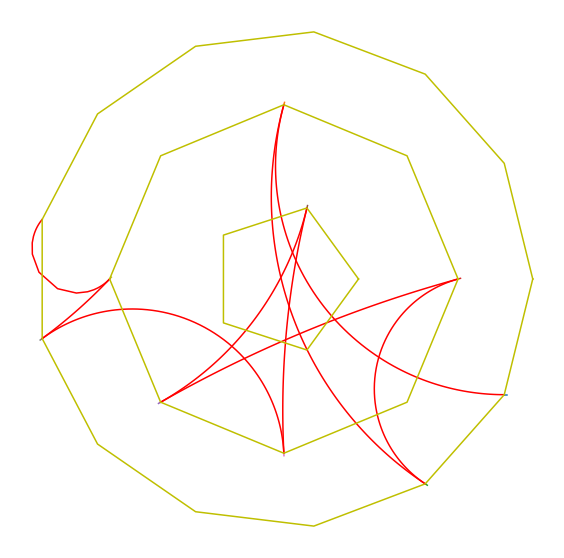

In [12]:
fig, ax = plt.subplots(1,1)
ax.set_axis_off() 
ax.set_aspect('equal') 

fig.set_size_inches(10,10)

pts = txt2path(txt2sig_txt('my plans will pull through'))
N = np.array([1,0])

for a, b in zip(pts[:-1], pts[1:]):

    ab(a, a+N)
    xx = np.cross( t2line((b+a)/2, b-a ) , t2line(a,N))
    CC = (xx / xx[2])[:2]
    R = np.linalg.norm(b - CC)
    # bit of a hack linearise and project
    T  = np.linspace(0,1,100)
    aa, bb = [], []
    for t in T:
        dd = (1-t)*a + t*b - CC
        #projection
        dd =  dd * R / np.linalg.norm(dd) + CC
        aa.append(dd[0])
        bb.append(dd[1])
    ax.plot(aa, bb,'r')
    N = ref(N,a-b)
    
rs = [100,70, 30]    
for n in [13, 8, 5]:
    X,Y = ring(n=n, r=rs.pop(0))
    ax.plot(X,Y,'y')

2.7112417593601634 1.8074945062401107
8.060173164228845 5.373448776152563
9.700735091368513 6.467156727579007
7.422513738449597 4.948342492299731
2.7112417593601608 1.8074945062401095
7.326324394534423 4.8842162630229495


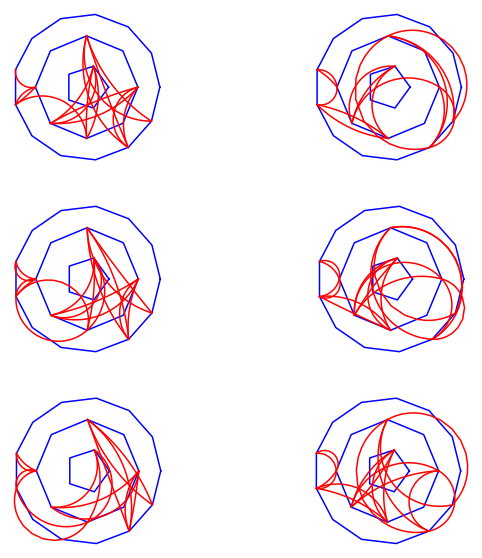

In [13]:


def mk_arcs( pts, N=np.array([-1,0])):
    length = np.linalg.norm
    arcs = []
    for a, b in zip(pts[:-1], pts[1:]):

        a2b =  b - a
        mid_pt = (b + a)/2
        xx = np.cross( t2line(mid_pt,a2b) , t2line(a,N))
        CC = (xx / xx[2])[:2]
        R = np.linalg.norm(a - CC)
        #reflect the tangent
        N = N - 2*np.dot(N, a2b)*a2b/sum(a2b*a2b)
        # bit of a hack linearise and project
        # failed if CC was on the segment
        # should maybe just drop the segment
        # tricky broadcasting
        
        threshold = length(b-a)/20
        dist = np.linalg.norm( CC - mid_pt)
   
            
        if dist <  threshold: 
            CC = mid_pt + 1.5*threshold*(CC - mid_pt)/dist
            R = np.linalg.norm(a - CC)
            print(np.linalg.norm( CC - mid_pt), threshold)
            #drop seg
            continue
            
            x, y = CC
            ax.plot([x],[y],'yo')
            M = np.ones((2,2))
            M[0] = a
            M[1] = b
            X,Y = M.transpose()
            ax.plot(X,Y,'g')  
        
        T  = np.linspace(0,1,50) 
            
        arc = T*a.reshape(-1,1) + (1-T)*b.reshape(-1,1)
        CC = CC.reshape(-1,1)
        arc = arc - CC
        dist = np.sqrt( (arc*arc).sum(axis=0)) 
        arcs.append(R*arc/dist + CC)
    return arcs

def show(pts, 
         N=np.array([1,0]),
         ax=plt):
    
    for aa in mk_arcs(pts, N):
        X,Y = aa
        ax.plot(X,Y,'r')

fig, axs = plt.subplots(3,2)
fig.set_size_inches(10,10)
axs = axs.ravel()

NS = np.array([ np.array([1,0]).dot(rot(t))
               for t in np.linspace(0,10,2)])

for ax in axs:
    ax.set_axis_off() 
    ax.set_aspect('equal') 
  
    for n,r  in zip([13, 8, 5],[100,70, 30]):
        X, Y = ring(n=n, r=r)
        ax.plot(X, Y ,'b')

    for NN in NS:
        show(pts,N=NN,ax= ax)
        
    NS = NS.dot(rot(30))
  

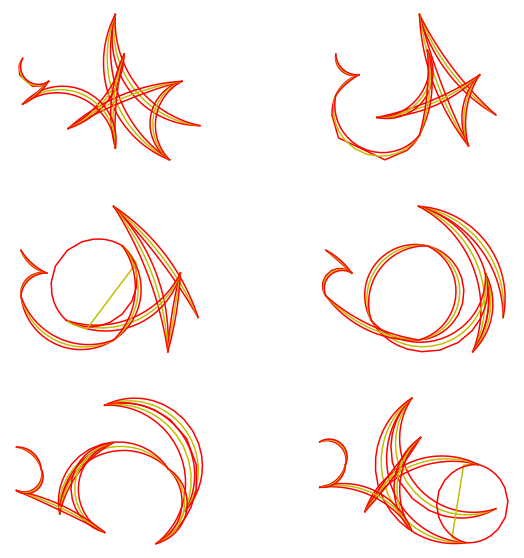

In [14]:
def rot(tx=30):
    tx = np.radians(tx)
    c, s = np.cos(tx), np.sin(tx)
    return np.array(((c, -s), (s, c)))

def mk_arc(a,b, N=np.array([-1,0])):
    length = np.linalg.norm
    a2b =  b - a
    mid_pt = (b + a)/2
    xx = np.cross( t2line(mid_pt, a2b) , t2line(a,N))
    CC = (xx / xx[2])[:2]
    R = np.linalg.norm(a - CC) 
            
    T  = np.linspace(0,1,50)     
    arc = T*a.reshape(-1,1) + (1-T)*b.reshape(-1,1)
    CC = CC.reshape(-1,1)
    arc = arc - CC
    dist = np.sqrt( (arc*arc).sum(axis=0)) 
    
    return R*arc/dist + CC

fig, axs = plt.subplots(3,2)
fig.set_size_inches(10,10)
axs = axs.ravel()
for ax in axs:
    ax.set_axis_off() 
    ax.set_aspect('equal') 
    
arcs = []
for ax, s in zip(axs, np.linspace(0,150,6)):
    N = rot(s)[0]
    for a, b in zip(pts[:-1], pts[1:]):
        cols = ['r','y','r']
        for t in np.linspace(0,12,3):
            arcs.append(mk_arc(a,b, N.dot(rot(t))))
            X,Y = arcs[-1]
            ax.plot(X,Y, cols.pop())
        a2b = b - a
        N = N - 2*np.dot(N, a2b)*a2b/sum(a2b*a2b)


In [15]:
ss = 'I have a wonderful life'
ss = "I feel loved and cared for"
ss = "I catch my connecting flight on time"
ss = "My plans will pull through"
#ss = 'I have a wonderful life'
#this is global
pts = txt2path(txt2sig_txt(ss))
txt2sig_txt(ss)

['m', 'p', 'l', 'n', 's', 'w', 't', 'h', 'r', 'g']

In [17]:
np.array(NS).dot(rot).dot(rot)

TypeError: unsupported operand type(s) for *: 'float' and 'function'

In [18]:
pwd

'/home/macbuse/Documents/macbuse.github.io/SIGILS'

In [19]:
sss[1]

NameError: name 'sss' is not defined

In [20]:
import pandas as pd

In [52]:
df = pd.read_excel("./sigils.xlsx", skiprows=2)

In [48]:
phrases = df.iloc[0][~df.iloc[0].isna()]

In [55]:
df.iloc[:,0]

0                                       Abuse
1                                         NaN
2            I recover fully from past abuse 
3       I am entirely free from past abusers 
4                   I am protected from abuse
                        ...                  
1682                I get a new phone quickly
1683                                      NaN
1684                                   Zodiac
1685                                      NaN
1686          Long list of Zodiac sigils here
Name: Unnamed: 0, Length: 1687, dtype: object

In [29]:
sigs = [''.join(txt2sig_txt(x)) for x in phrases]
sss = [x for x in sigs if len(x) < 8]

jj = " ".join(sss)
ww = [jj[i:i+3] for i in range(len(jj)-3)]
ww = [x for x in ww if ' ' not in x]

NameError: name 'phrases' is not defined

In [30]:
from collections import Counter

In [31]:
ll = Counter(ww)

NameError: name 'ww' is not defined

In [32]:
ll.most_common()

NameError: name 'll' is not defined

In [33]:
ll.most_common()[:20]

NameError: name 'll' is not defined

In [34]:
for x,y in hashed:
    if 'wth' not in x: continue
    print(y)

NameError: name 'hashed' is not defined

In [305]:
hashed = [(''.join(txt2sig_txt(x)),x) for x in phrases]

In [405]:
data = ' '.join(phrases).lower()

In [441]:
stop = '''with will have from this does what through 
when into without while they
over that time need than their'''

voc = [ x for x in txt.split() 
       if len(x) > 3 and x not in stop]
pp = Counter(voc)

In [432]:
pp.most_common()[:100]

[('strong', 61),
 ('free', 47),
 ('safe', 44),
 ('protected', 42),
 ('love', 40),
 ('find', 38),
 ('good', 36),
 ('well', 35),
 ('life', 35),
 ('relationship', 35),
 ('ease', 33),
 ('easily', 32),
 ('quickly', 30),
 ('devoted', 29),
 ('others', 28),
 ('healthy', 26),
 ('myself', 25),
 ('work', 24),
 ('energy', 23),
 ('happy', 23),
 ('family', 22),
 ('make', 21),
 ('control', 19),
 ('people', 19),
 ('connected', 19),
 ('body', 19),
 ('communicate', 18),
 ('feel', 18),
 ('place', 17),
 ('harm', 16),
 ('home', 16),
 ('remember', 15),
 ('spirits', 15),
 ('always', 14),
 ('friends', 14),
 ('past', 13),
 ('want', 13),
 ('full', 13),
 ('peace', 13),
 ('more', 13),
 ('dreams', 12),
 ('negative', 12),
 ('remain', 12),
 ('better', 12),
 ('appear', 12),
 ('luck', 12),
 ('courage', 12),
 ('pain', 12),
 ('loved', 12),
 ('know', 11),
 ('calm', 11),
 ('stay', 11),
 ('soon', 11),
 ('perfect', 11),
 ('clear', 11),
 ('year', 11),
 ('every', 11),
 ('things', 11),
 ('confident', 11),
 ('understand', 11),


In [429]:
' '.join([x for x,y in pp.most_common()[20:80] ])

'family make control people connected body communicate feel place harm home remember spirits always friends past want full peace more dreams negative remain better appear luck courage pain loved know calm stay soon perfect clear year every things confident understand energies person anxiety emotions accepted house relationships keep stop their ones hurt positive great help play long pass beautiful flows'

In [418]:
'with will have from this does what through  when'

'with will have from this strong free safe protected love find good well life relationship ease easily quickly devoted others'